In [2]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Step1: 請使用者輸入參數

In [ ]:
# GBM's State Variables
print("How long will the bond become mature? (in years)")
time_to_maturity = float(input())
print("How long is each period? (in years)")
time_unit = float(input())
print("What is the current Stock Price?")
S0 = float(input())
print("What is the riskless interest rate per period? (% p.a.)")
risk_free_rate = float(input())/100
print("What is the strike price")
strike_price = float(input())

# parameter of Hull White Process
print("What is the Volatility of the stock?(% p.a.)")
sigma = float(input())/100
print("What is the speed of the reversion to the mean?(% p.a.)")
a = float(input())/100
print("What is the forward rate of the stock?(% p.a.)")
forward_rate = float(input())/100
print("How many scenarios you would like to simulate?")
num_paths = int(input())
print("What’s today’s date?(type day first, then month, and then year)")
day, month, year = int(input("What's date today?")), int(input("What's the month today?")), int(input("What's the year today?")) 
todays_date = ql.Date(day, month, year)
day_count = ql.Thirty360()

timestep = round(time_to_maturity/time_unit) #timestep=360

In [163]:
## Example parameter
# GBM's State Variables
time_to_maturity = 10 #T (in years)
num_paths = 100 # Path
time_unit = 1/12 #dt
S0 = 100
risk_free_rate = 0.01
strike_price = 105

# parameter of Hull White Process
sigma = 0.1 #volatility
a = 0.1
timestep = round(time_to_maturity/time_unit) #timestep=360
forward_rate = 0.05
day_count = ql.Thirty360()
todays_date = ql.Date(13, 5, 2020)

## Step2: 使用Hull White Term Structure模擬一種情境下的Short rate
參考修改自http://gouthamanbalaraman.com/blog/hull-white-simulation-quantlib-python.html


In [152]:
ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [153]:
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, time_to_maturity, timestep, rng, False)

In [154]:
def generate_short_rate(timestep):
    sample_path = seq.next()
    path = sample_path.value()
    time = [path.time(j) for j in range(len(path))]
    value = [path[j] for j in range(len(path))]
    r = np.array(value)
    return np.array(time), r

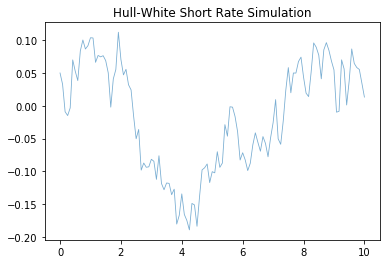

[ 0.05        0.03269615 -0.00913057 -0.01495051 -0.00325667  0.06990439
  0.0526415   0.03836139  0.08368778  0.1003031   0.08655451  0.09157174
  0.10370138  0.10337426  0.06617858  0.07672164  0.07457844  0.07631273
  0.06880715  0.05024748 -0.00208086  0.04095676  0.05537769  0.11209364
  0.07065759  0.04704096  0.05559108  0.03202011  0.02423408 -0.01556422
 -0.05034037 -0.03606304 -0.09812739 -0.08729163 -0.09376584 -0.09307604
 -0.08158101 -0.08462878 -0.11221332 -0.07618852 -0.11863198 -0.12801683
 -0.11772017 -0.11831483 -0.13560658 -0.12719129 -0.18039268 -0.16696382
 -0.13436501 -0.16569498 -0.17488501 -0.18927385 -0.14889746 -0.15117658
 -0.18372426 -0.13859747 -0.09774594 -0.09456325 -0.0887269  -0.11716123
 -0.10050832 -0.10221654 -0.07005325 -0.09388578 -0.08735934 -0.0287951
 -0.04635349 -0.00152449 -0.00209624 -0.01635613 -0.03947249 -0.08274957
 -0.0716237  -0.08249847 -0.09880439 -0.08763709 -0.05970579 -0.04126365
 -0.05566076 -0.06932538 -0.04693061 -0.05744293 -0.

In [156]:
time, r = generate_short_rate(timestep)
plt.plot(time, r, lw=0.8, alpha=0.6)

plt.title("Hull-White Short Rate Simulation")
plt.show()

print(r) #模擬出來每一期的利率

## Step3: 將步驟二模擬出來的Short rate代入GBM中，模擬一種情況的股價(一個path)

In [157]:
S = []
n = round(time_to_maturity/time_unit)
W = [0] + np.random.standard_normal(size = 1) # size=n，模擬「不同期的變化會不同」
W = float(W)
for i in range(len(time)):
    X = (float(r[i])-0.5*sigma**2)*float(time[i]) + sigma*W  #即老師Week6講義的第29頁第一式子exp裡面的東西
    S.append(S0*np.exp(X))  #即老師Week6講義的第29頁第一式子exp之外剩餘的東西
    W = (W + np.random.standard_normal(size = 1))*np.sqrt(time_unit)
    W = float(W)

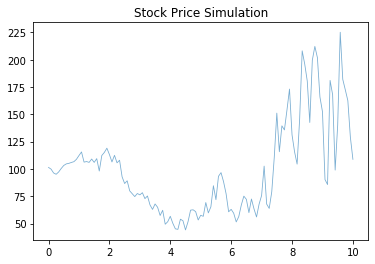

[101.39602451344332, 99.819057958258, 96.30083140498083, 95.13360663315947, 97.28341737246066, 100.4464680886941, 103.19732653407752, 104.63982378320567, 105.12154184553751, 105.94499786964909, 106.66016979211884, 108.8430832374272, 112.30483269690059, 115.57420407228483, 106.26108245734494, 106.77127815201032, 106.01151412550306, 109.09084559423468, 105.9987289064962, 109.4571011732188, 98.07300809346164, 112.32742405685998, 115.13438165145236, 119.01431510456439, 113.22981575809601, 106.41014643174714, 112.47035821426381, 105.63405192914668, 107.98344644785077, 92.7922343481763, 86.66989818917976, 89.16263212421461, 79.938058817826, 77.31819609631462, 74.71675615498053, 77.53470130438342, 76.30387384082368, 78.26853710078542, 72.84789515636425, 75.27654220913863, 67.0762664106655, 62.982585707078144, 67.97382312963943, 64.94976182586771, 57.42093889617067, 62.179236740353794, 49.41131175107268, 51.73475320544352, 56.69038050070048, 50.271068078232226, 45.18240158662739, 44.7266441360

In [158]:
plt.plot(time, S, lw=0.8, alpha=0.6)

plt.title("Stock Price Simulation")
plt.show()

print(S)

## Step4: 根據步驟三當中模擬出來的股價，計算該路徑的所有payoff折現到今日的價格(價值)

In [159]:
pay_offs = 0
total_scenarios = len(S)

for i in range(total_scenarios):
    price = S[i]
    pay_off = price - strike_price
    if(pay_off>0): 
        pay_offs = pay_offs + np.exp(-1.0*risk_free_rate*i)*pay_off
        
pay_offs

619.7441768962731

## Step5: 
## 用Monte Carlo模擬多個路徑情況，並將所有模擬出來的情境平均，得到一個最終的Call/Put價格

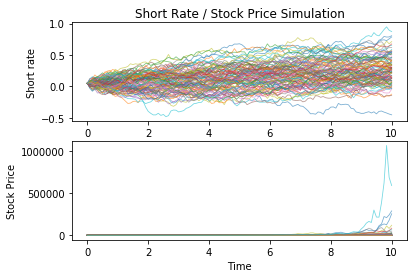

67153.4747221228


In [177]:
#將上述模擬一條路徑的程式碼打包到一個function中，依據使用者輸入想要模擬的次數用迴圈執行Monte Carlo，產生多個路徑以及每個路徑的折現價格(價值)
def Simulate(time_to_maturity, time_unit, S0, risk_free_rate, strike_price, sigma, a, forward_rate, todays_date):
    
    
    # 模擬不同期的interest rate
    day_count = ql.Thirty360()
    timestep = round(time_to_maturity/time_unit) 
    time, r = generate_short_rate(timestep)
    plt.subplot(2, 1, 1)
    plt.plot(time, r, lw=0.8, alpha=0.6)
    plt.title("Short Rate / Stock Price Simulation")
    plt.ylabel('Short rate')
    
    # 模擬不同期的stock price (base on模擬出來不同期的interest rate)
    S = []
    n = round(time_to_maturity/time_unit)
    W = [0] + np.random.standard_normal(size = 1) # size=n，模擬「不同期的變化會不同」
    W = float(W)
    for i in range(len(time)):
        X = (float(r[i])-0.5*sigma**2)*float(time[i]) + sigma*W  #即老師Week6講義的第29頁第一式子exp裡面的東西
        S.append(S0*np.exp(X))  #即老師Week6講義的第29頁第一式子exp之外剩餘的東西
        W = (W + np.random.standard_normal(size = 1))*np.sqrt(time_unit)
        W = float(W)
    plt.subplot(2, 1, 2)
    plt.plot(time, S, lw=0.8, alpha=0.6)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    
    # 依據模擬出來最後一期的stock price計算payoff，折現回本期加總即為此次債券模擬出來的當期價格
    pay_offs = 0
    total_scenarios = len(S)
    for i in range(total_scenarios):
        price = S[i]
        pay_off = price - strike_price
        if(pay_off>0): 
            pay_offs = pay_offs + np.exp(-1.0*risk_free_rate*i)*pay_off 
    return pay_offs


price = []
for i in range(num_paths):
    price.append(Simulate(time_to_maturity = 30, time_unit = 1/12, S0 = 100, risk_free_rate = 0.01, strike_price = 105, sigma = 0.1, a = 0.1, forward_rate = 0.05, todays_date = ql.Date(15, 1, 2015)))

plt.show()
price = sum(price) / len(price)
print(price)